## Objective: 

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations

import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization

from collections import Counter #Importing for counting values
from math import radians, cos, sin, asin, sqrt #Importing for mathmetics 

from scipy.stats import skew#Importing for data distribution
from scipy.stats import kurtosis#Importing for data distribution

from sklearn.model_selection import train_test_split #splitting dataset
#ML algorithm
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#for finding Error & Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#Loading the data:
train  = pd.read_csv("train_cab.csv")
test   = pd.read_csv("test.csv")

## Understanding the data :

In [3]:
train.head() #checking first five rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
test.head() #checking first five rows of the test dataset

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",test.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [6]:
train.info()#used to print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [8]:
train.describe() #used to view some basic statistical details like percentile, mean, std etc

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Cleaning & Missing Value Analysis :

In [10]:
train.isnull().sum()#isnull used for check the null values 

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [11]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  
#Using errors=’coerce’. It will replace all non-numeric values with NaN.
#by default used raise and raise genrate exception

In [12]:
train.dtypes#checking for data types

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [13]:
train.shape#The "shape" of an array is a tuple with the number of elements per axis (dimension

(16067, 7)

In [14]:
train.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [15]:
#i found an error in datetime so i replace it
train['pickup_datetime']=train['pickup_datetime'].replace({"43":np.nan})

In [16]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [17]:
train[['pickup_datetime']].head()

,pickup_datetime
0,2009-06-15 17:26:21
1,2010-01-05 16:52:16
2,2011-08-18 00:35:00
3,2012-04-21 04:30:42
4,2010-03-09 07:51:00


In [18]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [19]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [20]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [21]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [22]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [23]:
test.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

#### Observations :

1. An outlier in pickup_datetime column of value 43
2. Passenger count should not exceed 6(even if we consider SUV)
3. Latitudes range from -90 to 90. Longitudes range from -180 to 180
4. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

Checking the Datetime Variable : 

In [24]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


Checking the passenger count variable : 

In [25]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [26]:
train["passenger_count"].value_counts()

1.00       11258
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
53.00          2
43.00          2
536.00         1
58.00          1
1.30           1
5345.00        1
55.00          1
0.12           1
35.00          1
87.00          1
531.20         1
554.00         1
557.00         1
456.00         1
345.00         1
236.00         1
5334.00        1
354.00         1
537.00         1
535.00         1
Name: passenger_count, dtype: int64

We can see maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [27]:
train = train.drop(train[(train["passenger_count"]> 6)|(train["passenger_count"]<1)].index, axis=0)

In [28]:
train["passenger_count"].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [29]:
#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15933, 13)
0


In [30]:
train["passenger_count"].value_counts()

1.0    11258
2.0     2322
5.0     1045
3.0      676
4.0      329
6.0      302
1.3        1
Name: passenger_count, dtype: int64

In [31]:
train["passenger_count"]=train["passenger_count"].replace({1.3:0})

In [32]:
train = train.drop(train[(train["passenger_count"]> 6)|(train["passenger_count"]<1)].index, axis=0)

In [33]:
train["passenger_count"].value_counts()

1.0    11258
2.0     2322
5.0     1045
3.0      676
4.0      329
6.0      302
Name: passenger_count, dtype: int64

Next checking the Fare Amount variable :

In [34]:
##Frequency of fare amount to get to know whether the outliers are present or not
train["fare_amount"].value_counts()

6.50     753
4.50     665
8.50     623
5.30     471
4.90     457
        ... 
33.87      1
51.10      1
45.84      1
32.25      1
14.70      1
Name: fare_amount, Length: 466, dtype: int64

In [35]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

-3.0

In [36]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15927, 13)

<AxesSubplot:>

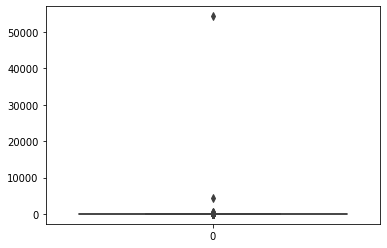

In [37]:
sns.boxplot(data=train["fare_amount"])#box plot used for outliers

In [38]:
#remove outliers 
train = train.drop(train[train["fare_amount"]>10000].index, axis=0)
train.shape

(15926, 13)

<AxesSubplot:>

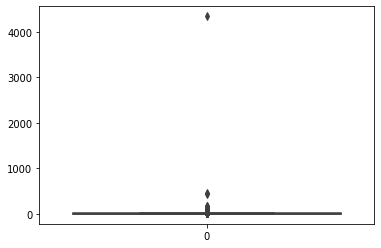

In [39]:
sns.boxplot(data=train["fare_amount"])

In [40]:
train = train.drop(train[train["fare_amount"]> 1000 ].index, axis=0)
train.shape

(15925, 13)

<AxesSubplot:>

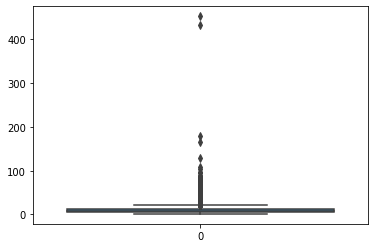

In [41]:
sns.boxplot(data=train["fare_amount"])

In [42]:
train = train.drop(train[train["fare_amount"]> 400].index, axis=0)
train.shape

(15923, 13)

<AxesSubplot:>

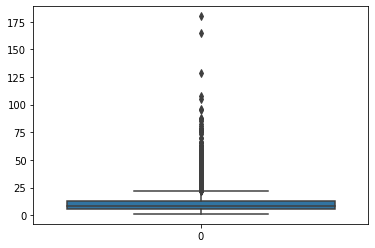

In [43]:
sns.boxplot(data=train["fare_amount"])

In [44]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15899, 13)
0


In [45]:
train["fare_amount"].describe()

count    15899.000000
mean        11.321895
std          9.668439
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [46]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [47]:
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [48]:
#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [49]:
train[train['pickup_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [50]:
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [51]:
train[train['dropoff_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [52]:
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [53]:
train[train['dropoff_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [54]:
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [55]:
train.shape

(15898, 13)

In [56]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [57]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Now we have successfully cleared our both datasets. 

# Feature Engg.

Calculating distance based on the given coordinates :


In [58]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance

#https://www.geeksforgeeks.org/program-distance-two-points-earth/
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [59]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [60]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [61]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [62]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [63]:
train.shape

(15898, 14)

In [64]:
train.nunique()

fare_amount            457
pickup_datetime      15853
pickup_longitude     13669
pickup_latitude      14108
dropoff_longitude    13761
dropoff_latitude     14133
passenger_count          6
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15445
dtype: int64

In [65]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [66]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
9464        0.000000
3128        0.000000
290         0.000000
3830        0.000000
2885        0.000000
Name: distance, Length: 15898, dtype: float64

As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have travelled
Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers
We need to remove these values


In [67]:
list(train['distance']).count(0)

454

In [68]:
Counter(train['distance'] == 0)

Counter({False: 15444, True: 454})

In [69]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [70]:
Counter(train['fare_amount'] == 0)

Counter({False: 15898})

In [71]:
###we will remove the rows whose distance value is zero
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15444, 14)

<AxesSubplot:>

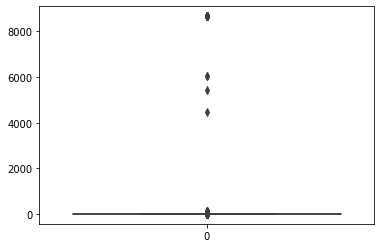

In [72]:
sns.boxplot(data=train['distance'])

In [73]:
#we will remove the rows whose distance values is very high which is more than 2000 kms
train = train.drop(train[train['distance'] >2000 ].index, axis=0)

<AxesSubplot:>

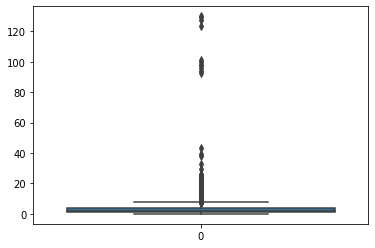

In [74]:
sns.boxplot(data=train['distance'])

In [75]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [76]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [77]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [78]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [79]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [80]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [81]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [82]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Data Visualization :

Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

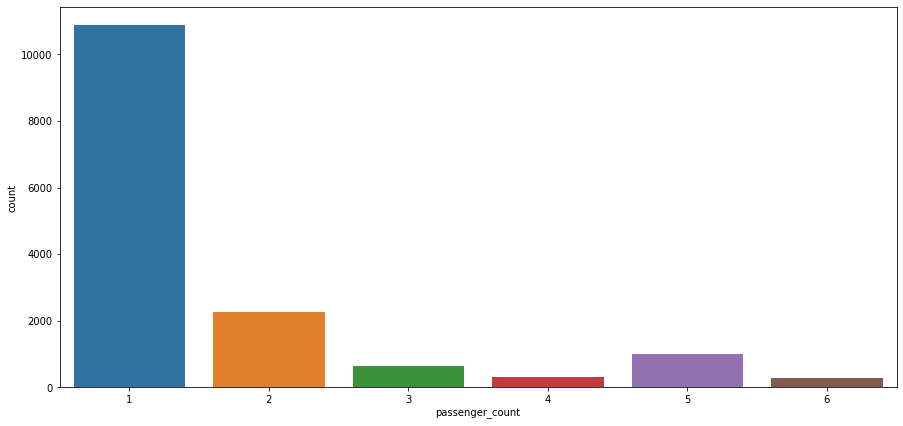

In [83]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

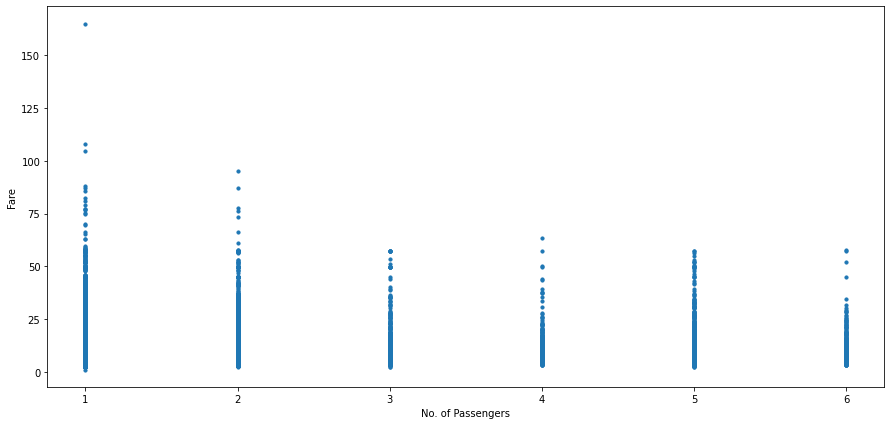

In [84]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Observations :
   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

<AxesSubplot:xlabel='Date', ylabel='count'>

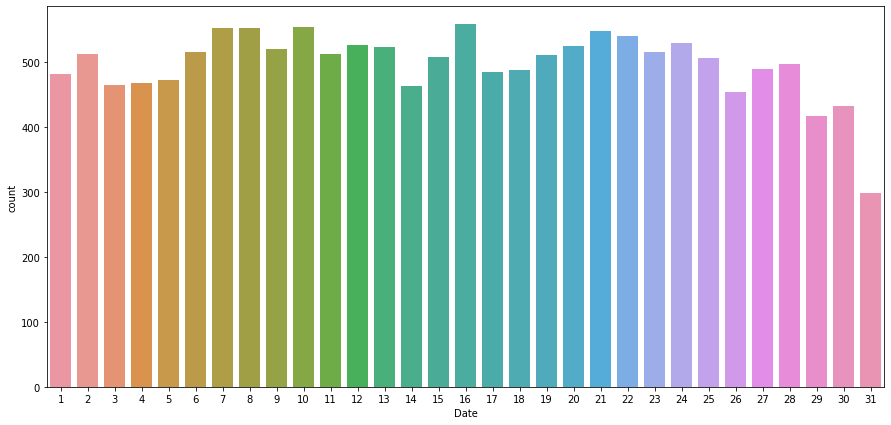

In [85]:
# Count plot on HOUR count
plt.figure(figsize=(15,7))
sns.countplot(x='Date', data=train)

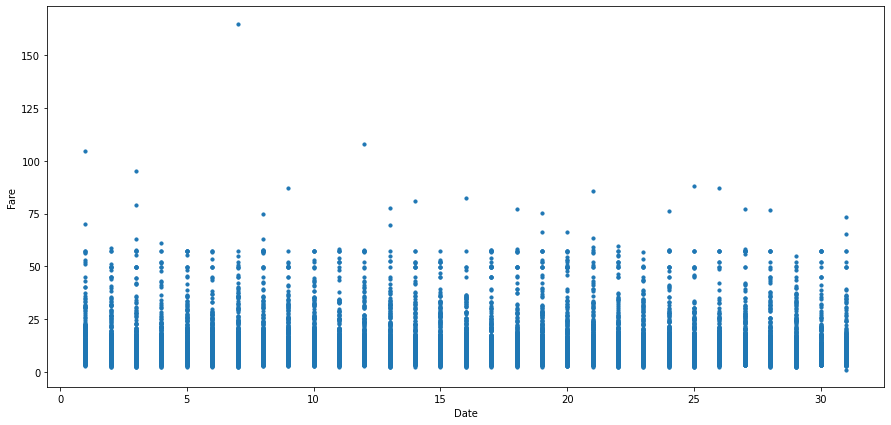

In [86]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='count'>

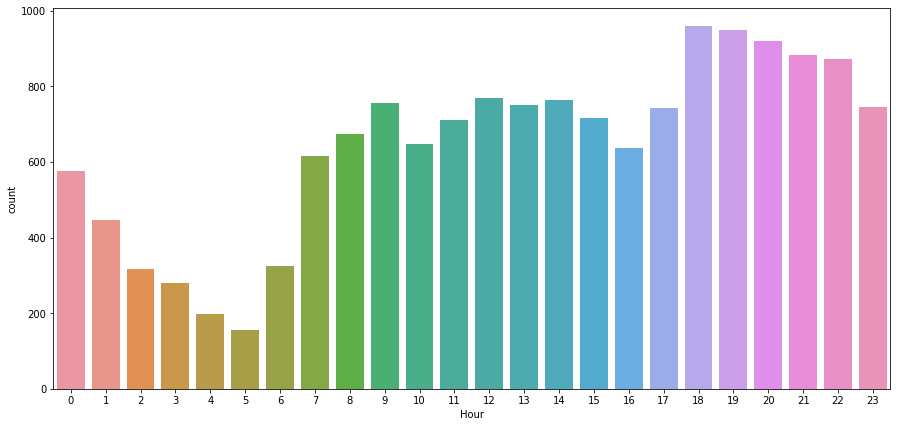

In [87]:
# Count plot on HOUR count
plt.figure(figsize=(15,7))
sns.countplot(x='Hour', data=train)

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

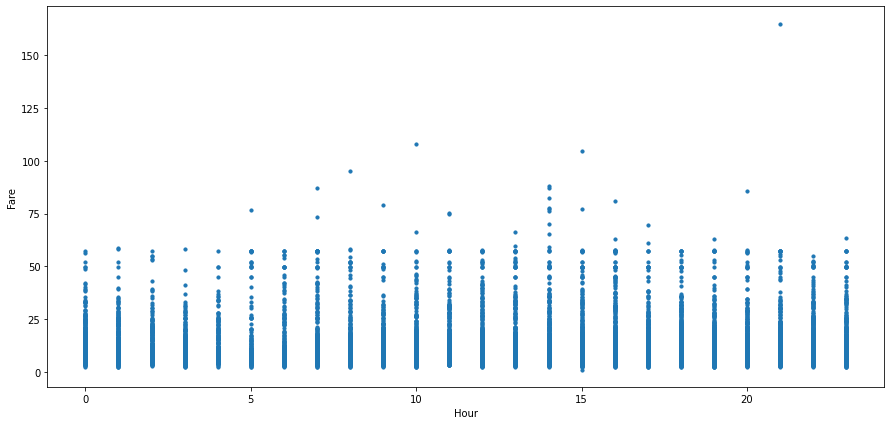

In [88]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


<AxesSubplot:xlabel='Day', ylabel='count'>

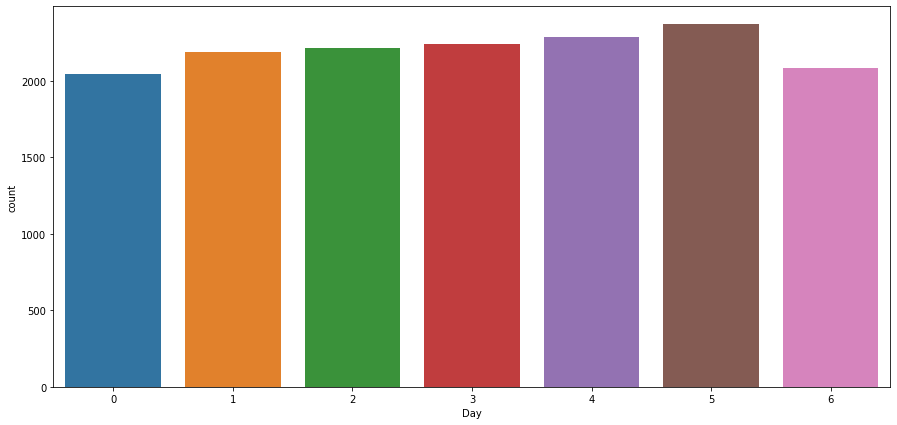

In [89]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

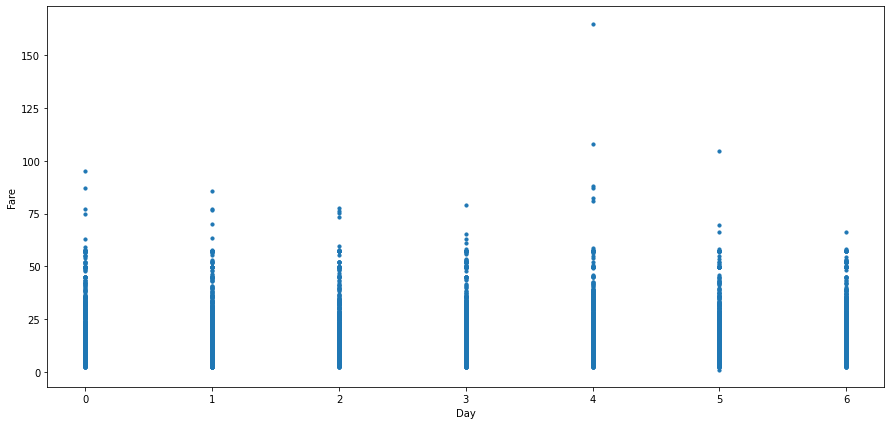

In [90]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

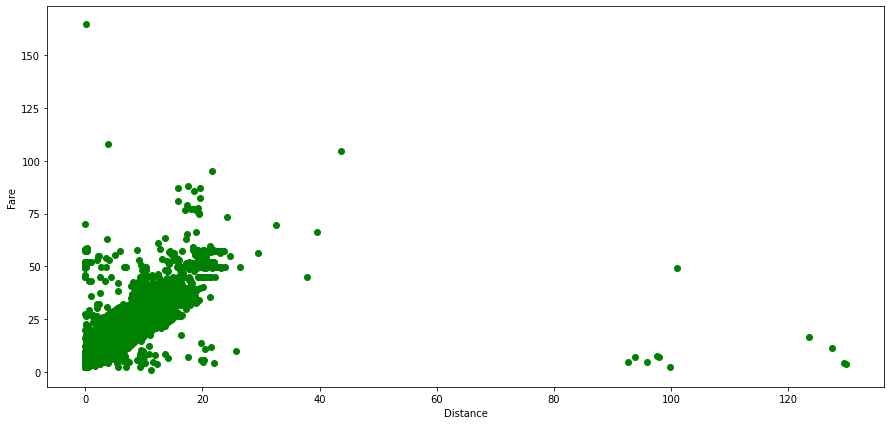

In [91]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

# Feature Scaling :

In [92]:
#https://www.statology.org/skewness-kurtosis-python/
#http://statisticalconcepts.blogspot.com/2017/05/skewness-and-kurtosis-in-statistics.html

In [93]:
display(skew(train.fare_amount))
display(skew(train.distance))

3.2275288817348233

10.37325679774994

In [94]:
display(kurtosis(train.fare_amount))
display(kurtosis(train.distance))

15.968767896894846

219.17362008087224

fare_amount


C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


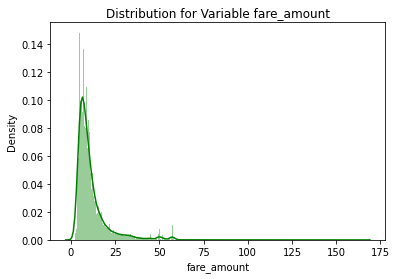

distance


C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


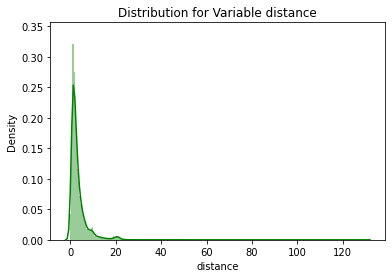

In [95]:
#Normality check of training data is uniformly distributed or not-
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [96]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


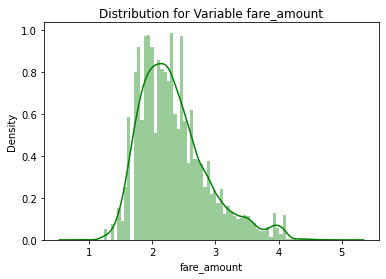

distance


C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


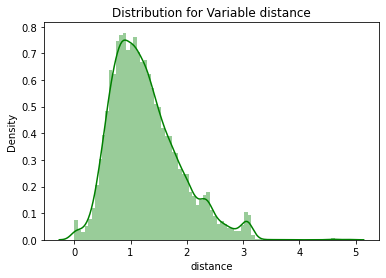

In [97]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

In [98]:
display(skew(train.distance))
display(kurtosis(train.distance))

0.9150696905590723

1.1128232247976761

C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


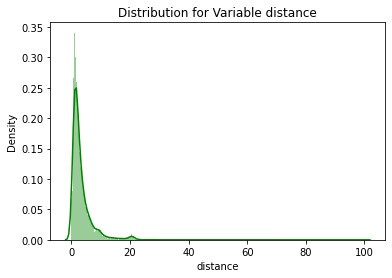

In [99]:
#Normality check for test data is uniformly distributed or not-
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [100]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

C:\Users\Pushpendra\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


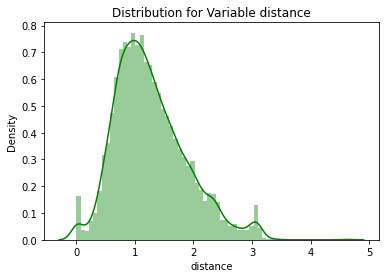

In [101]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()


As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our test data

# Applying ML ALgorithms: 

In [102]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


In [103]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:,0], test_size = 0.20, random_state = 1)

In [104]:
print(X_train.shape)
print(X_test.shape)

(12336, 7)
(3085, 7)


### Linear Regression Model :

In [105]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [106]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [107]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

# Error & Accuracy

In [108]:
#https://stats.stackexchange.com/questions/11636/the-difference-between-mse-and-mape
#https://stats.stackexchange.com/questions/299712/what-are-the-shortcomings-of-the-mean-absolute-percentage-error-mape/299713#299713

def MAE(y_actual, y_predicted):
    mae=mean_absolute_error(y_actual, y_predicted)
    return "Mean Absolute Error is                :"+str(mae)

def RMSPE(y_actual, y_predicted):
    rmspe=(np.sqrt(np.mean(np.square((y_actual- y_predicted) /y_actual)))) * 100
    return "Root Mean Squared Percentage Error is :"+str(rmspe)

def RMSE(y_actual, y_predicted):
    mse=mean_squared_error(y_actual, y_predicted)
    rms = sqrt(mse)
    return "Root Mean Squared Error is            :"+str(rms)
 
def MAPE(y_actual, y_predicted):
    mape=mean_absolute_percentage_error(y_actual, y_predicted)*100
    return "Mean Absolute Percentage Error is     :"+str(mape)

In [109]:
#Train

In [110]:
display(MAE(y_train,pred_train_LR))
display(MAPE(y_train,pred_train_LR))
display(RMSE(y_train,pred_train_LR))
display(RMSPE(y_train,pred_train_LR))

'Mean Absolute Error is                :0.17281281199743248'

'Mean Absolute Percentage Error is     :7.55281760732123'

'Root Mean Squared Error is            :0.2662046515449016'

'Root Mean Squared Percentage Error is :11.783104342364096'

In [111]:
#Test

In [112]:
display(MAE(y_test,pred_test_LR ))
display(MAPE(y_test, pred_test_LR ))
display(RMSE(y_test, pred_test_LR ))
display(RMSPE(y_test,pred_test_LR ))

'Mean Absolute Error is                :0.17145022247394073'

'Mean Absolute Percentage Error is     :7.40667729514645'

'Root Mean Squared Error is            :0.2657932503002036'

'Root Mean Squared Percentage Error is :11.138925329198141'

### Decision tree Model : 

In [113]:
fit_DT = DecisionTreeRegressor().fit(X_train,y_train)

In [114]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [115]:
#Train

In [116]:
display(MAE(y_train,pred_train_DT))
display(MAPE(y_train,pred_train_DT))
display(RMSE(y_train,pred_train_DT))
display(RMSPE(y_train,pred_train_DT))

'Mean Absolute Error is                :4.4819314710062256e-18'

'Mean Absolute Percentage Error is     :1.5385096272918867e-16'

'Root Mean Squared Error is            :5.069423008001435e-17'

'Root Mean Squared Percentage Error is :1.5503850053675335e-15'

In [117]:
#Test

In [118]:
display(MAE(y_test,pred_test_DT))
display(MAPE(y_test, pred_test_DT ))
display(RMSE(y_test, pred_test_DT ))
display(RMSPE(y_test,pred_test_DT ))

'Mean Absolute Error is                :0.2382984783714758'

'Mean Absolute Percentage Error is     :10.518250501599903'

'Root Mean Squared Error is            :0.3602069723698936'

'Root Mean Squared Percentage Error is :16.69816121405505'

### Random Forest Model :

In [119]:
fit_RF = RandomForestRegressor().fit(X_train,y_train)

In [120]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [121]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [122]:
#Train

In [123]:
display(MAE(y_train, pred_train_RF))
display(MAPE(y_train, pred_train_RF))#8     2
display(RMSE(y_train, pred_train_RF))#1     0
display(RMSPE(y_train, pred_train_RF))

'Mean Absolute Error is                :0.06276306089515532'

'Mean Absolute Percentage Error is     :2.8045313402636407'

'Root Mean Squared Error is            :0.09350403240633642'

'Root Mean Squared Percentage Error is :4.379061802387351'

In [124]:
#Test

In [125]:
display(MAE(y_test, pred_test_RF))
display(MAPE(y_test, pred_test_RF))#22    7
display(RMSE(y_test, pred_test_RF))#5     0
display(RMSPE(y_test, pred_test_RF))

'Mean Absolute Error is                :0.16539068086455702'

'Mean Absolute Percentage Error is     :7.3274806151377065'

'Root Mean Squared Error is            :0.24715958202085736'

'Root Mean Squared Percentage Error is :11.104469906499823'

# Optimizing the results with parameters tuning :

In [126]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
display(fit_RF.get_params())

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Random Hyperparameter Grid

In [127]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor()
n_estimator = list(range(100,200,10))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,'max_depth': depth}
               

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, cv = 5)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF1 = randomcv_rf.predict(X_train)
predictions_RRF2 = randomcv_rf.predict(X_test)

In [128]:
view_best_params_RRF = randomcv_rf.best_params_
display(view_best_params_RRF)
best_model = randomcv_rf.best_estimator_
display(best_model)

{'n_estimators': 110, 'max_depth': 13}

RandomForestRegressor(max_depth=13, n_estimators=110)

In [129]:
#Train

In [130]:
display(MAE(y_train, predictions_RRF1))
display(MAPE(y_train,predictions_RRF1))
display(RMSE(y_train,predictions_RRF1))
display(RMSPE(y_train,predictions_RRF1))

'Mean Absolute Error is                :0.09970708240188524'

'Mean Absolute Percentage Error is     :4.527920275103174'

'Root Mean Squared Error is            :0.1369053679851192'

'Root Mean Squared Percentage Error is :6.34839766411581'

In [131]:
#Test

In [132]:
display(MAE(y_test,predictions_RRF2))
display(MAPE(y_test,predictions_RRF2))
display(RMSE(y_test,predictions_RRF2))
display(RMSPE(y_test,predictions_RRF2))

'Mean Absolute Error is                :0.16329296576861832'

'Mean Absolute Percentage Error is     :7.216493269066902'

'Root Mean Squared Error is            :0.24672449257206835'

'Root Mean Squared Percentage Error is :11.054734501570492'

# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using Random search CV for random forest model

In [133]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,1.200946
1,1,2015,1,27,1,13,1.231205
2,1,2011,10,8,5,11,0.481579
3,1,2012,12,1,5,21,1.085538
4,1,2012,12,1,5,21,1.854312


In [134]:
predictions_test=randomcv_rf.predict(test)

In [135]:
test['Predicted_fare'] = predictions_test

In [136]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.426039
1,1,2015,1,27,1,13,1.231205,2.527670
2,1,2011,10,8,5,11,0.481579,1.656909
3,1,2012,12,1,5,21,1.085538,2.266045
4,1,2012,12,1,5,21,1.854312,2.869353


In [137]:
test.to_csv('result_py.csv')

# Thanks